# Claude

## Prompt
(anexado um csv com uma amostra reduzida dos dados)<br>
podes dar-me o código python para desenhar com plotly um gráfico de barras do número de fogos por ano, com cada barra dividida por região

In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Read the CSV data (assuming it's in a string format in 'data')
df = pd.read_csv("fires/Fires.csv.zip", encoding='latin1')

# Group the data by Year and Region and count occurrences
fires_by_year_region = df.groupby(['Year', 'Region']).size().reset_index(name='count')

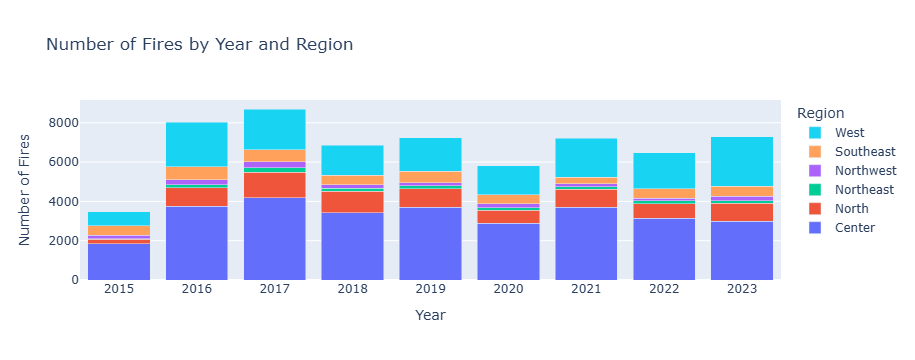

In [5]:
# Get unique years and regions
years = sorted(df['Year'].unique())
regions = sorted(df['Region'].unique())

# Create traces for each region
fig = go.Figure()

for region in regions:
    region_data = fires_by_year_region[fires_by_year_region['Region'] == region]
    
    fig.add_trace(go.Bar(
        name=region,
        x=region_data['Year'],
        y=region_data['count'],
    ))

# Update layout for stacked bars
fig.update_layout(
    barmode='stack',
    title='Number of Fires by Year and Region',
    xaxis_title='Year',
    yaxis_title='Number of Fires',
    showlegend=True,
    legend_title='Region'
)

# Show the plot
fig.show()

vamos fazer umas alterações.
* considera que a importação do dataset já foi feita para o objeto "fires_by_year_region". devolve o código apenas para criar o gráfico
* se possível, usa o plotly express para simplificar a sintaxe
* altera para barras horizontais
* altera o esquema de cores para fazer lembrar o fogo

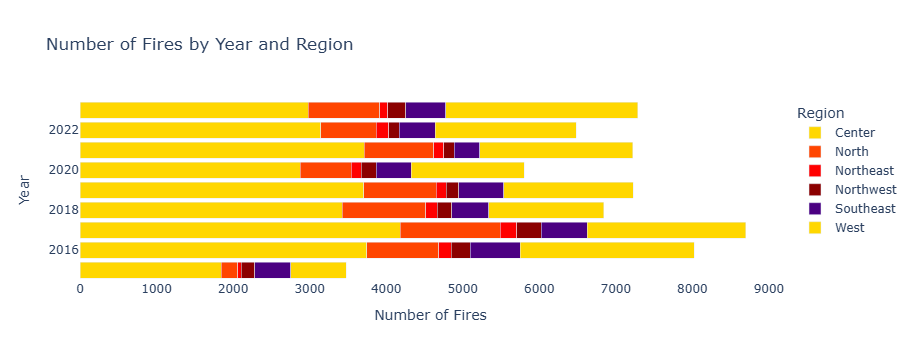

In [6]:
# Create horizontal stacked bar chart
fig = px.bar(
    fires_by_year_region,
    x='count',
    y='Year',
    color='Region',
    orientation='h',
    title='Number of Fires by Year and Region',
    labels={'count': 'Number of Fires', 'Year': 'Year'},
    color_discrete_sequence=['#FFD700', '#FF4500', '#FF0000', '#8B0000', '#4B0082']  # Gold -> Red -> Dark Red
)

# Update layout
fig.update_layout(
    barmode='stack',
    showlegend=True,
    legend_title='Region',
    yaxis={'categoryorder': 'category descending'},  # Years in descending order
    plot_bgcolor='white'
)

# Show the plot
fig.show()

altera a forma como o as cores são selecionadas do esquema, para que não apareçam cores repetidas caso sejam incluídas mais regiões

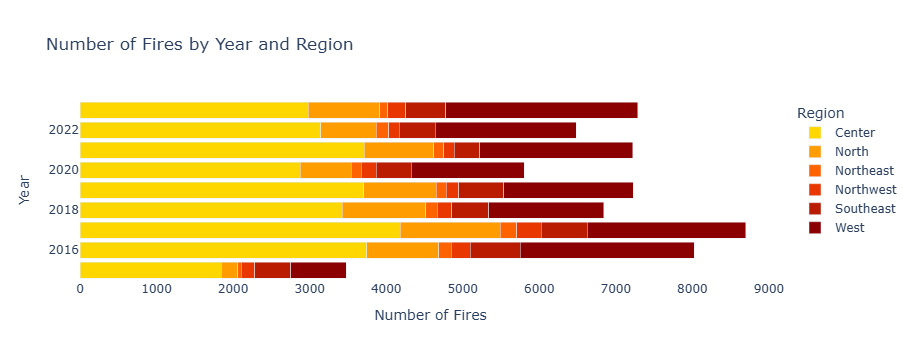

In [8]:
# Criar um mapa de cores personalizado usando interpolação
# O parâmetro 'n_colors' será automaticamente ajustado ao número de regiões únicas
custom_colorscale = px.colors.sample_colorscale(
    ['#FFD700', '#FF4500', '#8B0000'],  # Cores base: dourado -> laranja -> vermelho escuro
    samplepoints=len(fires_by_year_region['Region'].unique()) # tive de mudar. o parametro devolvido pelo modelo era n_colors
)

# Criar o gráfico de barras horizontal
fig = px.bar(
    fires_by_year_region,
    x='count',
    y='Year',
    color='Region',
    orientation='h',
    title='Number of Fires by Year and Region',
    labels={'count': 'Number of Fires', 'Year': 'Year'},
    color_discrete_sequence=custom_colorscale  # Usar nossa escala personalizada
)

# Atualizar o layout
fig.update_layout(
    barmode='stack',
    showlegend=True,
    legend_title='Region',
    yaxis={'categoryorder': 'category descending'},
    plot_bgcolor='white'
)

# Mostrar o gráfico
fig.show()

---